The following program is my first foray into using the FastF1 Python library for data anaylsis. The following program does the following:
    Selects the lap times for the drivers who finished in the top 10 of the race
    Takes an average of each individual driver's sector times
    Calculates the correlation between a driver's finishing position and their average sector time for each of the 
    three sectors
    Plots the data in a graph

The goal of the program was to
    1. Figure out which sector is the most important for a driver to have a fast time in
    2. See if there was a trend throughout the years


api         WARNING 	

NO CACHE! Api caching has not been enabled! 
	It is highly recommended to enable this feature for much faster data loading!
	Use `fastf1.Cache.enable_cache('path/to/cache/')`

core           INFO 	Loading data for Austrian Grand Prix - Race [v2.2.8]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
api            INFO 	Fetching weather data...
api            INFO 	Fetching race control messages...
core           INFO 	Finished loading data for 20 drivers: ['33', '7', '5', '8', '20', '31', '11', '14', '16', '9', 

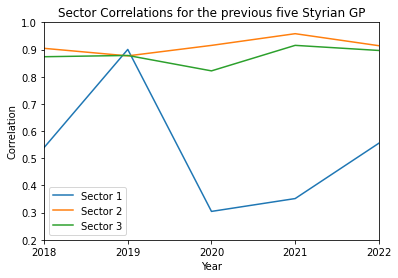

In [3]:
import fastf1 as f1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


corr1 = []
corr2 = []
corr3 = []
finish = list(range(1, 11))
years = [2018, 2019 , 2020, 2021, 2022]

for year in years:
    session = f1.get_session(year, 'Austria', 'Race')
    session.load()
    sector1_avg = []
    sector2_avg = []
    sector3_avg = []
    for x in session.drivers[0:10]:
            sectors = session.laps.pick_driver(x)[['Sector1Time', 'Sector2Time', 'Sector3Time', 'IsAccurate']]
            sectors['Sector1Seconds'] = sectors['Sector1Time'].dt.total_seconds()
            sectors['Sector2Seconds'] = sectors['Sector2Time'].dt.total_seconds()
            sectors['Sector3Seconds'] = sectors['Sector3Time'].dt.total_seconds()
            length = len(sectors)
            sector1sum = 0
            sector2sum = 0
            sector3sum = 0
            count = 0
            i = 0
            while i < length:
                if sectors.iat[i, 3]:
                    sector1sum = sectors.iat[i, 4] + sector1sum
                    sector2sum = sectors.iat[i, 5] + sector2sum
                    sector3sum = sectors.iat[i, 6] + sector3sum
                    count = count + 1
                i = i + 1
            if count > 0:
                sector1_avg.append(sector1sum/count)
                sector2_avg.append(sector2sum/count)
                sector3_avg.append(sector3sum/count)
    c1 = np.corrcoef(sector1_avg, finish)
    c2 = np.corrcoef(sector2_avg, finish)
    c3 = np.corrcoef(sector3_avg, finish)
    corr1.append(c1[0,1])
    corr2.append(c2[0,1])
    corr3.append(c3[0,1])


column_names = ['Year', 'Sector 1 Correlation', 'Sector 2 Correlation', 'Sector 3 Correlation']
correlations = pd.DataFrame(list(zip(years, corr1, corr2, corr3)), columns = column_names)
print(correlations)

plt.ylim(0.2, 1)
plt.xlim(2018, 2022)
plt.title('Sector Correlations for the previous five Styrian GP')
plt.xlabel('Year')
plt.ylabel('Correlation')
plt.xticks(years)
plt.plot(correlations['Year'], correlations['Sector 1 Correlation'], label = 'Sector 1')
plt.plot(correlations['Year'], correlations['Sector 2 Correlation'], label = 'Sector 2')
plt.plot(correlations['Year'], correlations['Sector 3 Correlation'], label = 'Sector 3')
plt.legend()
plt.show()

From the above results, Sector 2 has consistently been the most correlated sector with finishing position. There has been quite a lot of variation in the correlation with Sector 1. A possible explanation is the importance of straight line speed in a given year. Sector 1 consists of two straights, with no difficult turns or hairpins. It is possible that, when the cars have varying performance in straight-line speed, this sector becomes more important in relation to finishing position. Additionally, it is the quickest sector, which could introduce more noise into the lap times. 

The above code could be applied to any of the GPs. 